# Curve Fitting using Ideal Equations + Scipy vs Neural Network on just the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import os

Define the ideal equations

In [4]:
def pump_model_QH(Q,n):
    QH_coeff = [-0.580818, 1.65095, -1.4245, 0.105362, 0.104778, 0.249879]
    nref = .5
    QH_func = np.poly1d(QH_coeff)
    H = QH_func(Q)*(n/nref)**2
    return H

def pump_model_QP(Q,n):
    QP_coeff = [-0.263138, 0.0574016, 0.517813, 0.0929127]
    nref = .5
    QP_func = np.poly1d(QP_coeff)
    P = QP_func(Q)*(n/nref)**2
    return P

Load in the pump data from one of the pumps

In [5]:
# Load in the data
df = pd.read_csv('pump_data/Data - pump 1.csv')
df

,flow,head,power,rpm,efficiency
0,0.989212,0.318876,0.986826,0.672286,1.450767
1,0.917752,0.360729,0.987367,0.676562,1.521793
2,0.838042,0.407832,0.988202,0.688775,1.569743
3,0.765277,0.456209,0.988743,0.703248,1.602606
4,0.701884,0.498755,0.988104,0.722615,1.607967
...,...,...,...,...,...
523,0.014900,0.011464,0.015448,0.105880,0.050185
524,0.012259,0.011423,0.015407,0.106826,0.041255
525,0.008270,0.011343,0.015451,0.105387,0.027556
526,0.005223,0.011279,0.015310,0.105181,0.017464


# Adding QH, QP and Residual Columns

In [6]:
df['QH'] = pump_model_QH(df['flow'], df['rpm'])
df['QP'] = pump_model_QP(df['flow'], df['rpm'])
df

,flow,head,power,rpm,efficiency,QH,QP
0,0.989212,0.318876,0.986826,0.672286,1.450767,0.196028,0.735075
1,0.917752,0.360729,0.987367,0.676562,1.521793,0.232002,0.756328
2,0.838042,0.407832,0.988202,0.688775,1.569743,0.279911,0.782399
3,0.765277,0.456209,0.988743,0.703248,1.602606,0.330620,0.800920
4,0.701884,0.498755,0.988104,0.722615,1.607967,0.385377,0.822210
...,...,...,...,...,...,...,...
523,0.014900,0.011464,0.015448,0.105880,0.050185,0.011276,0.004513
524,0.012259,0.011423,0.015407,0.106826,0.041255,0.011465,0.004531
525,0.008270,0.011343,0.015451,0.105387,0.027556,0.011140,0.004318
526,0.005223,0.011279,0.015310,0.105181,0.017464,0.011082,0.004231


In [7]:
df['H Residual'] = df['head'] - df['QH']
df['P Residual'] = df['power'] - df['QP']
df

,flow,head,power,rpm,efficiency,QH,QP,H Residual,P Residual
0,0.989212,0.318876,0.986826,0.672286,1.450767,0.196028,0.735075,0.122848,0.251751
1,0.917752,0.360729,0.987367,0.676562,1.521793,0.232002,0.756328,0.128727,0.231039
2,0.838042,0.407832,0.988202,0.688775,1.569743,0.279911,0.782399,0.127921,0.205803
3,0.765277,0.456209,0.988743,0.703248,1.602606,0.330620,0.800920,0.125589,0.187823
4,0.701884,0.498755,0.988104,0.722615,1.607967,0.385377,0.822210,0.113378,0.165894
...,...,...,...,...,...,...,...,...,...
523,0.014900,0.011464,0.015448,0.105880,0.050185,0.011276,0.004513,0.000188,0.010935
524,0.012259,0.011423,0.015407,0.106826,0.041255,0.011465,0.004531,-0.000042,0.010875
525,0.008270,0.011343,0.015451,0.105387,0.027556,0.011140,0.004318,0.000204,0.011133
526,0.005223,0.011279,0.015310,0.105181,0.017464,0.011082,0.004231,0.000197,0.011079


#  Plotting the data

<Axes: xlabel='flow', ylabel='QH'>

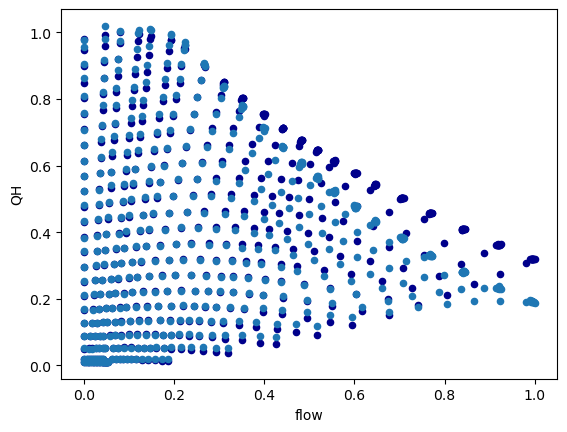

In [8]:
# Plotting the ideal equations vs the actual values to visualize the difference

ax = df.plot.scatter(x='flow', y='head', c='DarkBlue')
df.plot.scatter(x='flow', y = 'QH', ax=ax)
ax

<Axes: xlabel='flow', ylabel='H Residual'>

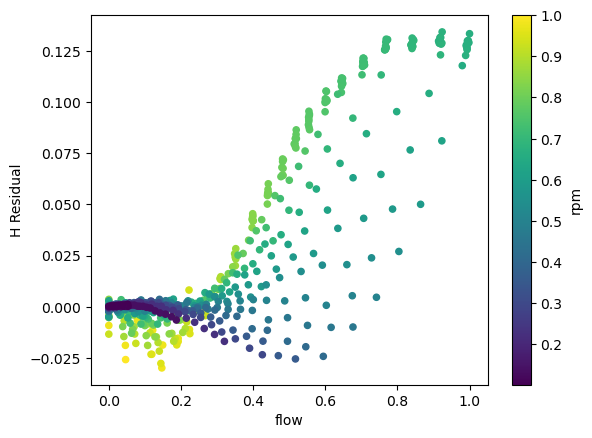

In [9]:
ax = df.plot.scatter(x='flow', y='H Residual', c='rpm')
ax

<Axes: xlabel='flow', ylabel='P Residual'>

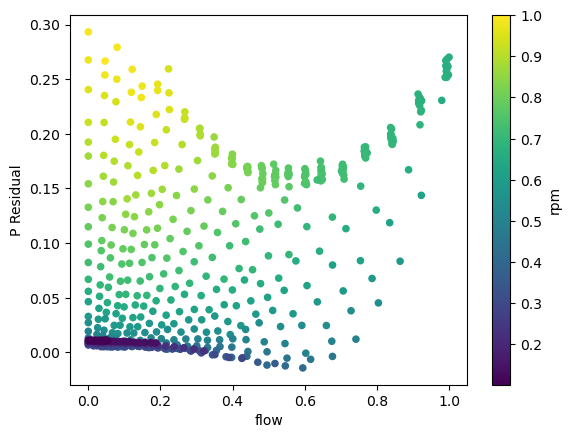

In [10]:
ax = df.plot.scatter(x='flow', y='P Residual', c='rpm')
ax

# Fitting with Polynomial

C:\Users\mikke\AppData\Local\Temp\ipykernel_19268\2764640719.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  surf = ax.scatter(df['flow'], df['rpm'], df['H Residual'], cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)


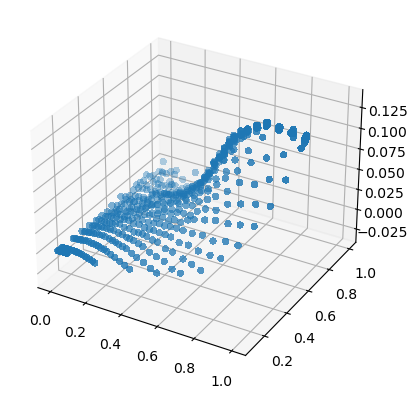

In [ ]:
# Plot the residuals in 3d
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.scatter(df['flow'], df['rpm'], df['H Residual'], cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

[-0.00185585  0.07652484  0.00836027 -0.42370788  0.02383579 -0.31421314
 -0.37692437 -0.03820714 -0.01431825  1.59104979]


C:\Users\mikke\AppData\Local\Temp\ipykernel_19268\967001742.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df['flow'], df['rpm'], df['H Residual'], cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)


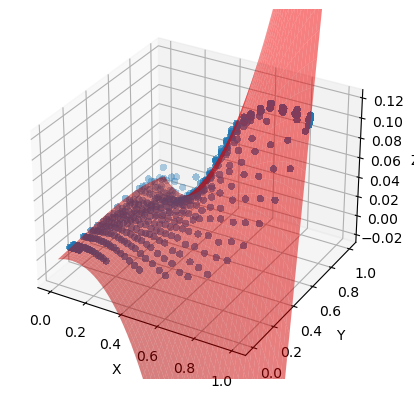

In [ ]:
from scipy.optimize import curve_fit

# Define a function to define the desired equation, in this case a 3 order polynomial
def func(xy, a, b, c, d, e, f, g, h, i, j):
    x, y = xy
    return a + b*x + c*y + d*x**2 + e*y**2 + f*x*y + g*x**3 + h*y**3 + i*x*y**2 + j*y*x**2

# Get the coefficients by using scipy's curve_fit function
coeff, pcov = curve_fit(func, (df['flow'], df['rpm']), df['H Residual'])
print(coeff)


# Create a 3d plot of the data, showing the residuals and the predicted value according to the coefficients
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['flow'], df['rpm'], df['H Residual'], cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
x_range = np.linspace(0, 1)
y_range = np.linspace(0, 1)
X, Y = np.meshgrid(x_range, y_range)
Z = func((X, Y), *coeff)
ax.plot_surface(X, Y, Z, color='red', alpha=0.5)
ax.set_zlim(-0.025, 0.125)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [14]:
# Create a new column for the new H residual, and get the average residual
df['New QH'] = df['QH'] + func((df['flow'], df['rpm']), *coeff)
df['New H Residual'] = df['head'] - df['New QH']
df.abs().mean()

flow              0.328322
head              0.413966
power             0.512259
rpm               0.596697
efficiency        1.029969
QH                0.386745
QP                0.420655
H Residual        0.032141
P Residual        0.092002
New QH            0.413966
New H Residual    0.002812
dtype: float64

[-0.00244992  0.25861987  0.09334686 -0.72265025 -0.4151557  -0.73422185
  0.1095328   0.60130739  0.38640741  1.3072245 ]


C:\Users\mikke\AppData\Local\Temp\ipykernel_19268\840531912.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df['flow'], df['rpm'], df['P Residual'], cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)


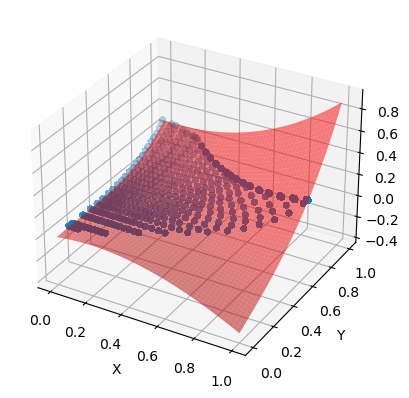

In [15]:
# Get the coefficients for the P residual equation
coeff, pcov = curve_fit(func, (df['flow'], df['rpm']), df['P Residual'])
print(coeff)

# Create a 3d plot of the data, showing the residuals and the plane of predictions according to the coefficients
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['flow'], df['rpm'], df['P Residual'], cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
x_range = np.linspace(0, 1)
y_range = np.linspace(0, 1)
X, Y = np.meshgrid(x_range, y_range)
Z = func((X, Y), *coeff)
ax.plot_surface(X, Y, Z, color='red', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [16]:
# Create a new column for the new residuals and caculate the new average residual
df['New QP'] = df['QP'] + func((df['flow'], df['rpm']), *coeff)
df['New P Residual'] = df['power'] - df['New QP']
df.abs().mean()

flow              0.328322
head              0.413966
power             0.512259
rpm               0.596697
efficiency        1.029969
QH                0.386745
QP                0.420655
H Residual        0.032141
P Residual        0.092002
New QH            0.413966
New H Residual    0.002812
New QP            0.512259
New P Residual    0.005100
dtype: float64

Curve fitting using a polynomial gives an average residual ~10x lower for head and ~18x lower for flow than using the ideal equations

In [19]:
# Remove the columns that were just made, but create new columns for percent error

ideal_percent = df.copy()
ideal_percent = ideal_percent.drop(['New QH', 'New H Residual', 'New QP', 'New P Residual'], axis=1)
ideal_percent['QH Percent Error'] = abs(ideal_percent['H Residual'] / ideal_percent['head'])
ideal_percent['QP Percent Error'] = abs(ideal_percent['P Residual'] / ideal_percent['power'])
ideal_percent.mean()

flow                0.328322
head                0.413966
power               0.512259
rpm                 0.596697
efficiency          1.029969
QH                  0.386745
QP                  0.420655
H Residual          0.027221
P Residual          0.091604
QH Percent Error    0.082465
QP Percent Error    0.191543
dtype: float64

The ideal equations have an 8.2% error in average for QH, 19.2% for QP

In [20]:
# Get the percent error of the curve-fitted values

actual_percent = df.copy()
actual_percent.columns = actual_percent.columns.str.strip()
actual_percent = actual_percent.drop(['QH', 'QP', 'H Residual', 'P Residual'], axis=1)
actual_percent['QH Percent Error'] = abs(actual_percent['New H Residual'] / actual_percent['head'])
actual_percent['QP Percent Error'] = abs(actual_percent['New P Residual'] / actual_percent['power'])
actual_percent.mean()

flow                3.283223e-01
head                4.139663e-01
power               5.122591e-01
rpm                 5.966974e-01
efficiency          1.029969e+00
New QH              4.139663e-01
New H Residual      1.898207e-11
New QP              5.122591e-01
New P Residual     -4.467862e-10
QH Percent Error    1.108998e-02
QP Percent Error    2.925008e-02
dtype: float64

Meanwhile the curve fit has about 1.1% error for QH and 2.9% error for QP

# Curve fitting using a simple neural network

Training a model on the data points alone (without using the ideal equations)

In [46]:
import torch
from torch.utils.data import Dataset 
import random

# Custom dataset. Data is returned with one pump being one item 
# Samples = [ Q, rpm ] and lables = [ H ]

class PumpData(Dataset):
    def __init__(self, directory):
        # get directory and list of csv files in directory 
        self.dir = directory                                        
        self.files = os.listdir(self.dir)
        self.csv_files = [f for f in self.files if (f.find(".csv") > 0)]
        self.num_pumps = len(self.csv_files)
        self.data = [[], []]
        order = random.sample(range(0, 15), 15)
        # Create a random order to determine which pumps are for training/testing
        order = random.sample(range(0, 15), 15)

        # Load 12 pumps in random order for the training dataset 
        for n in range(12):
            d = np.genfromtxt(os.path.join(self.dir, self.csv_files[order[n]]), delimiter=",")
            d = np.delete(d, 0, axis=0)                             # delete header row which is text (nan)
            self.data[0].append(d)
        
        # Load the 3 other pumps in random order for the test dataset
        for n in range(12, self.num_pumps):
            d = np.genfromtxt(os.path.join(self.dir, self.csv_files[order[n]]), delimiter=",")
            d = np.delete(d, 0, axis=0)                             # delete header row which is text (nan) 
            self.data[1].append(d)

        self.data[0] = np.array(self.data[0])
        self.data[0] = self.data[0].reshape(-1, self.data[0].shape[-1]) # Combine pump data into one array
        self.data[1] = np.array(self.data[1])
        self.data[1] = self.data[1].reshape(-1, self.data[1].shape[-1])

    def __len__(self):
        return self.num_pumps                                       # length of the dataset = number of pumps 


    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        samples = self.data[idx][:,[0,3]]                           # get column 0 and 3 (Q and rpm) as samples 
        labels = self.data[idx][:,1]                                # get labels from column 1 = H  

        samples = torch.from_numpy(samples.astype(np.float32))      # convert from numpy array to pytorch tensor 
        labels = torch.from_numpy(labels.astype(np.float32)) 
        labels = labels.view(labels.shape[0], 1)                    # only one label size [n], but needs to be in [n, 1] 

        return samples, labels 

[7, 8, 13, 12, 10, 6, 1, 3, 4, 2, 14, 11, 0, 9, 5]


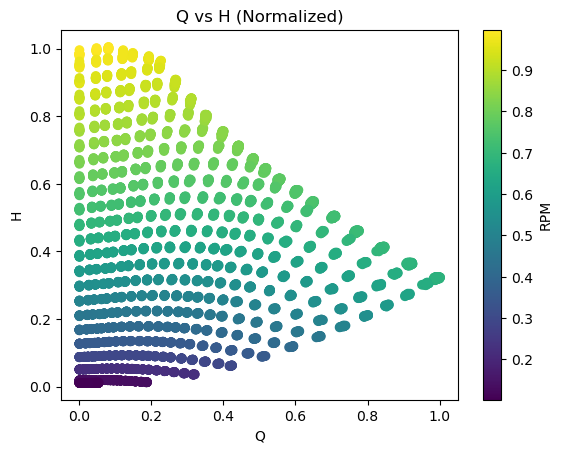

In [47]:
data_directory = os.path.join(os.getcwd(), "pump_data")

# Visualize Data 
i = 0


# Initialize the dataset, where pump_data[0] is the train set and pump_data[1] is the test set
pump_data =  PumpData(data_directory)

samples, labels = pump_data[i]

# Plot the training data
plt.scatter(samples[:,0], labels, c=samples[:,1])
plt.title('Q vs H (Normalized)')
plt.xlabel('Q')
plt.ylabel('H')
cbar = plt.colorbar()
cbar.set_label('RPM')
plt.show()

Building the Neural Network

In [50]:
import torch.nn as nn

class CurveFit(nn.Module):
    def __init__(self, in_count, num_neurons, out_count):
        super(CurveFit, self).__init__()
        self.fc1 = nn.Linear(in_count, num_neurons)
        self.fc2 = nn.Linear(num_neurons, num_neurons)
        self.fc3 = nn.Linear(num_neurons, out_count)
        self.relu = nn.LeakyReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)
    
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


Load in the training data, printing the number of samples and features

In [53]:
# define dataset and data loader 

train_dataset = pump_data[0]                                    # sample, labels 
samples, labels = train_dataset

n_samples, n_features = samples.shape
print("Samples:", n_samples, " --  Features:", n_features)

# Initialize the dataloader based off the residuals of the training data
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = 384, shuffle=True)

Samples: 6336  --  Features: 2


Train the model

In [65]:
model = CurveFit(2, 50, 1).to(device)


learning_rate = 0.1
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 5000

for epoch in range(num_epochs):
    #for i, (samples, labels) in enumerate(train_dataset):

    samples, labels = train_dataset

    # push data to device (CPU or GPU)
    samples = samples.to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(samples)
    loss = criterion(outputs, labels)

    # backward pass 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
    if (epoch+1) % 100 == 0: 
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f} ')

model: 10 epoch: 100, loss = 0.0035 
model: 10 epoch: 200, loss = 0.0021 
model: 10 epoch: 300, loss = 0.0016 
model: 10 epoch: 400, loss = 0.0013 
model: 10 epoch: 500, loss = 0.0010 
model: 10 epoch: 600, loss = 0.0008 
model: 10 epoch: 700, loss = 0.0006 
model: 10 epoch: 800, loss = 0.0005 
model: 10 epoch: 900, loss = 0.0004 
model: 10 epoch: 1000, loss = 0.0003 
model: 10 epoch: 1100, loss = 0.0003 
model: 10 epoch: 1200, loss = 0.0002 
model: 10 epoch: 1300, loss = 0.0002 
model: 10 epoch: 1400, loss = 0.0002 
model: 10 epoch: 1500, loss = 0.0001 
model: 10 epoch: 1600, loss = 0.0001 
model: 10 epoch: 1700, loss = 0.0001 
model: 10 epoch: 1800, loss = 0.0001 
model: 10 epoch: 1900, loss = 0.0001 
model: 10 epoch: 2000, loss = 0.0001 
model: 10 epoch: 2100, loss = 0.0001 
model: 10 epoch: 2200, loss = 0.0001 
model: 10 epoch: 2300, loss = 0.0001 
model: 10 epoch: 2400, loss = 0.0001 
model: 10 epoch: 2500, loss = 0.0001 
model: 10 epoch: 2600, loss = 0.0001 
model: 10 epoch: 2700

In [66]:
samples, labels = pump_data[1]              # get the training data

q = samples[:, [0]].numpy()                 # separate the samples into q and rpm
rpm = samples[:, [1]].numpy()

samples = samples.to(device)
labels = labels.to(device)

predicted = model(samples).detach()                    # detach so we dont train the model 
predicted = predicted.cpu().numpy()                     # move to cpu and convert tensor to numpy array 

labels = labels.cpu().numpy()  

# Calculate the percent error over the trianing dataset
err = 0.0
n_samples = 528*3
error = np.empty(n_samples)
for n in range(n_samples):
    error[n] = abs(100 * (predicted[n].item() - labels[n].item()) / labels[n].item())
    err += abs(100 * (predicted[n].item() - labels[n].item()) / labels[n].item())
err = err/n_samples

print(f'Average error = {err:.4f}%')

Average error = 5.3154%


Training a simple neural network on all the data can get us to ~5% error

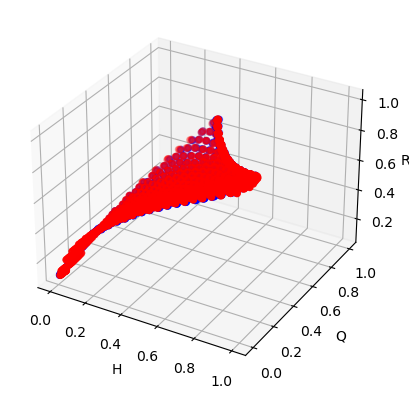

In [69]:
# Predicted (blue) vs actual (red)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(labels, q, rpm, zdir='z', c= 'red')
ax.scatter(predicted, q, rpm, zdir='z', c= 'b')
ax.set_xlabel('H')
ax.set_ylabel('Q')
ax.set_zlabel('RPM')
plt.show()

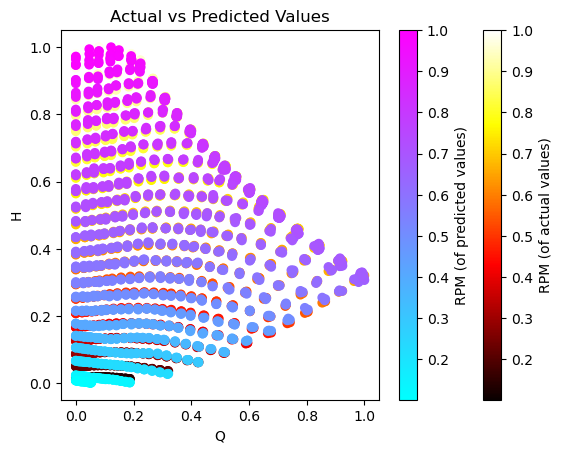

In [73]:
pa = plt.scatter(q, labels, c=rpm, cmap=plt.cm.hot)
cbar = plt.colorbar(pa)
pb = plt.scatter(q, predicted, c=rpm, cmap=plt.cm.cool)
cbar2 = plt.colorbar(pb)
plt.title('Actual vs Predicted Values')
plt.xlabel('Q')
plt.ylabel('H')
cbar.set_label('RPM (of actual values)')
cbar2.set_label('RPM (of predicted values)')
plt.show()